### Importing the libraries

- numpy <br>
`NumPy (short for Numerical Python) is a popular Python library used for performing numerical computations in Python. It provides a multidimensional array object (called ndarray) which is the core data structure used in NumPy.`

- pandas <br> 
`Pandas is a Python library used for data manipulation and analysis. It provides data structures for efficiently storing and manipulating large datasets, as well as a variety of functions for working with those datasets.`

- pickle <br>
`Pickle is a Python module used for serializing and de-serializing Python objects. Serialization refers to the process of converting an object into a byte stream, which can then be stored or transmitted. De-serialization is the reverse process of converting the byte stream back into an object.`

- sklearn <br>
`Scikit-learn, also known as sklearn, is a popular Python library used for machine learning tasks such as classification, regression, and clustering. It provides a wide range of tools and algorithms for data mining and analysis, including tools for data preprocessing, feature extraction, and feature selection.`


In [28]:
import numpy as np
import pandas as pd
import sklearn
import pickle

### Import the dataset

In [29]:
dataTrain = pd.read_csv(r'C:\Users\Thenuka Jayarathna\Documents\Programming\ICBT_FINAL_PROJECT\House-Value-Prediction-2\MLApplications\Datasets\train.csv')
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
dataTest = pd.read_csv(r'C:\Users\Thenuka Jayarathna\Documents\Programming\ICBT_FINAL_PROJECT\House-Value-Prediction-2\MLApplications\Datasets\test.csv')
dataTest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Checking Correlation between labels and the target label.

Text(0.5, 1.0, 'Lables with correlation coefficient > Threshold (0.5)')

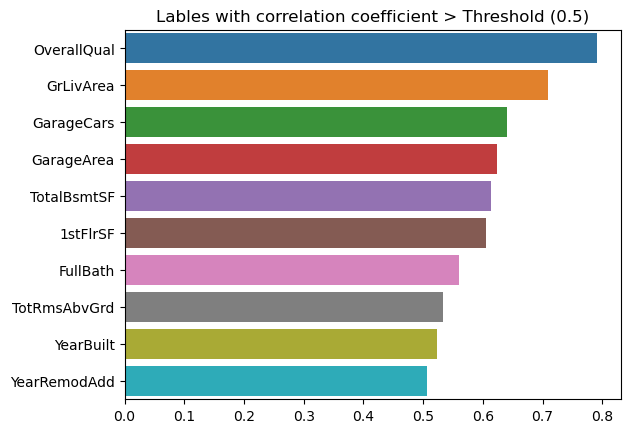

In [31]:
THRESHOLD = 0.5

data = dataTrain.corr()["SalePrice"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>THRESHOLD:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Lables with correlation coefficient > Threshold (0.5)')

### Data preparation ( Drop unnecessary columns) 

In [32]:
unnecessary = []
lab = dataTrain.SalePrice
idCol = dataTest.Id
dataTrain = dataTrain.drop(columns=[str(item) for item in dataTrain.columns[1:] if str(item) not in labels])
dataTest = dataTest.drop(columns=[str(item) for item in dataTest.columns[1:] if str(item) not in labels])
dataTrain = dataTrain.drop(columns=['Id'])
dataTest = dataTest.drop(columns=['Id'])

### Fill all the null values 

In [33]:
dataTrain = dataTrain.fillna(method='bfill')
dataTest = dataTest.fillna(method='bfill')

### Checking if further NaN values persist.

In [34]:
sum(dataTrain.isnull().sum()), sum(dataTest.isnull().sum())

(0, 0)

In [35]:
yTrain = lab
xTest = dataTest.to_numpy()
xTrain = dataTrain.to_numpy()

xTrain.shape, yTrain.shape, xTest.shape

((1460, 10), (1460,), (1459, 10))

**Random Forest**<a id="rf"></a>


In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=15)
model.fit(xTrain,yTrain)
preds = model.predict(xTrain)
print('R2 Score: ', sklearn.metrics.r2_score(yTrain,preds)) 
f1 = sklearn.metrics.f1_score(yTrain, preds, average='weighted')
print('F1 Score: ', f1)
accuracy = sklearn.metrics.accuracy_score(yTrain, preds)
print('Accuracy: ', accuracy)

R2 Score:  0.9997797675776505
F1 Score:  0.9853299488346774
Accuracy:  0.986986301369863


In [41]:
xTrain.shape

(1460, 10)

In [42]:
Final = pd.DataFrame(columns=["Id","SalePrice"])
Final["Id"] = idCol
Final["SalePrice"] = model.predict(xTest)
Final["Id"] = Final["Id"].astype(int)
Final

,Id,SalePrice
0,1461,117500
1,1462,157900
2,1463,181000
3,1464,181000
4,1465,180000
...,...,...
1454,2915,88000
1455,2916,88000
1456,2917,148000
1457,2918,93500


In [43]:
pickle.dump(model, open('house_value_prediction_RF01.h5', 'wb'))

In [44]:
xTest

array([[5.000e+00, 1.961e+03, 1.961e+03, ..., 5.000e+00, 1.000e+00,
        7.300e+02],
       [6.000e+00, 1.958e+03, 1.958e+03, ..., 6.000e+00, 1.000e+00,
        3.120e+02],
       [5.000e+00, 1.997e+03, 1.998e+03, ..., 6.000e+00, 2.000e+00,
        4.820e+02],
       ...,
       [5.000e+00, 1.960e+03, 1.996e+03, ..., 7.000e+00, 2.000e+00,
        5.760e+02],
       [5.000e+00, 1.992e+03, 1.992e+03, ..., 6.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.993e+03, 1.994e+03, ..., 9.000e+00, 3.000e+00,
        6.500e+02]])

In [45]:
dataTest

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0
